In [1]:
install.packages("igraph")


  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  1.2.6  1.4.2              TRUE

  Binaries will be installed
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yaman\AppData\Local\Temp\RtmpuOjwbr\downloaded_packages


In [2]:
library(igraph)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] "Probability =  0.002"
[1] 900
[1] "Mean of Degrees: 1.74888888888889"
[1] "Variance of Degrees: 1.70328018786306"
[1] "Probability =  0.006"
[1] 900
[1] "Mean of Degrees: 5.46222222222222"
[1] "Variance of Degrees: 5.20546780373254"


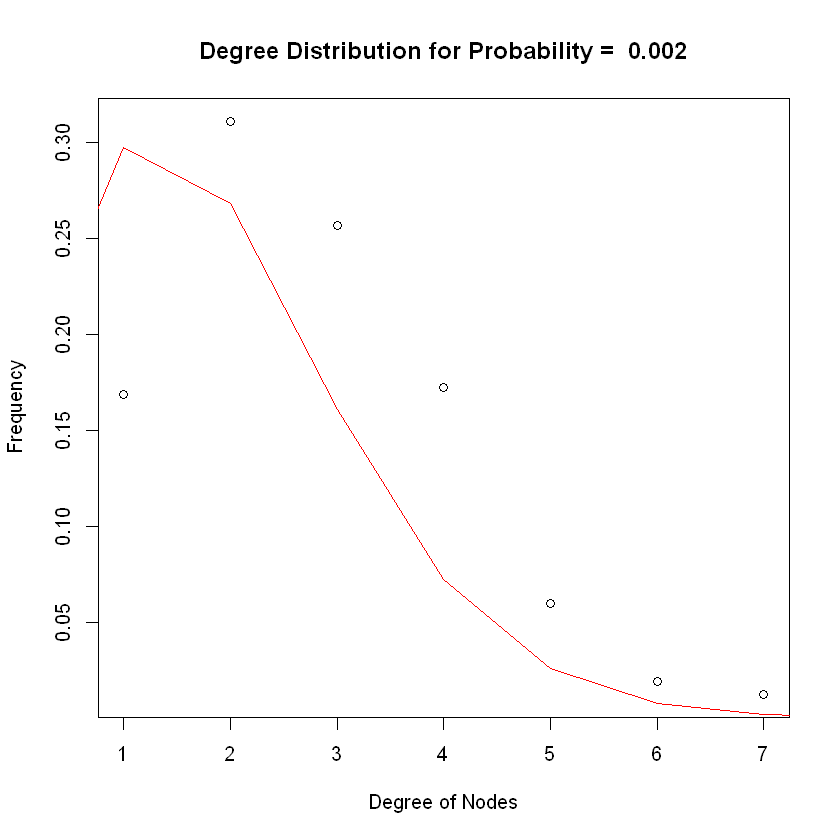

[1] "Probability =  0.012"
[1] 900
[1] "Mean of Degrees: 10.86"
[1] "Variance of Degrees: 10.5054060066741"


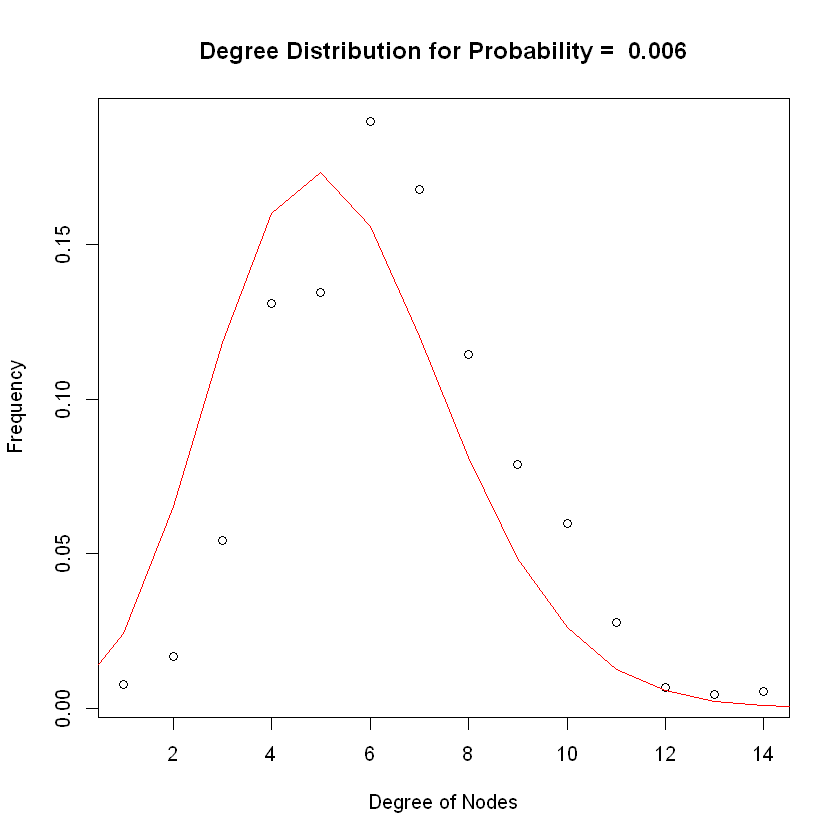

[1] "Probability =  0.045"
[1] 900
[1] "Mean of Degrees: 40.5666666666667"
[1] "Variance of Degrees: 40.0100111234705"


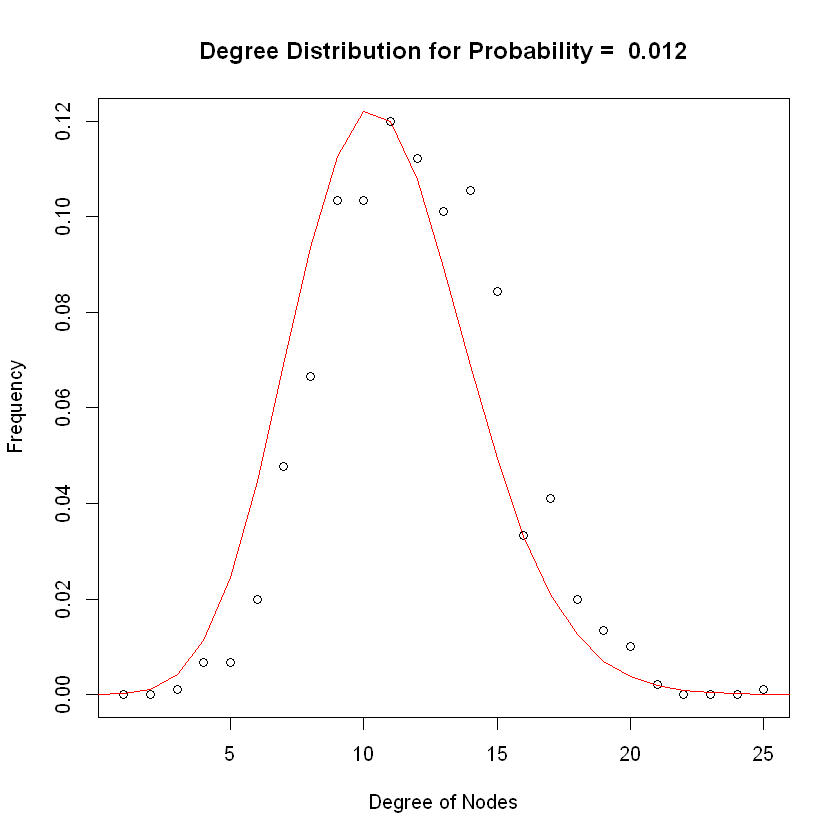

[1] "Probability =  0.1"
[1] 900
[1] "Mean of Degrees: 89.9088888888889"
[1] "Variance of Degrees: 85.5067062167841"


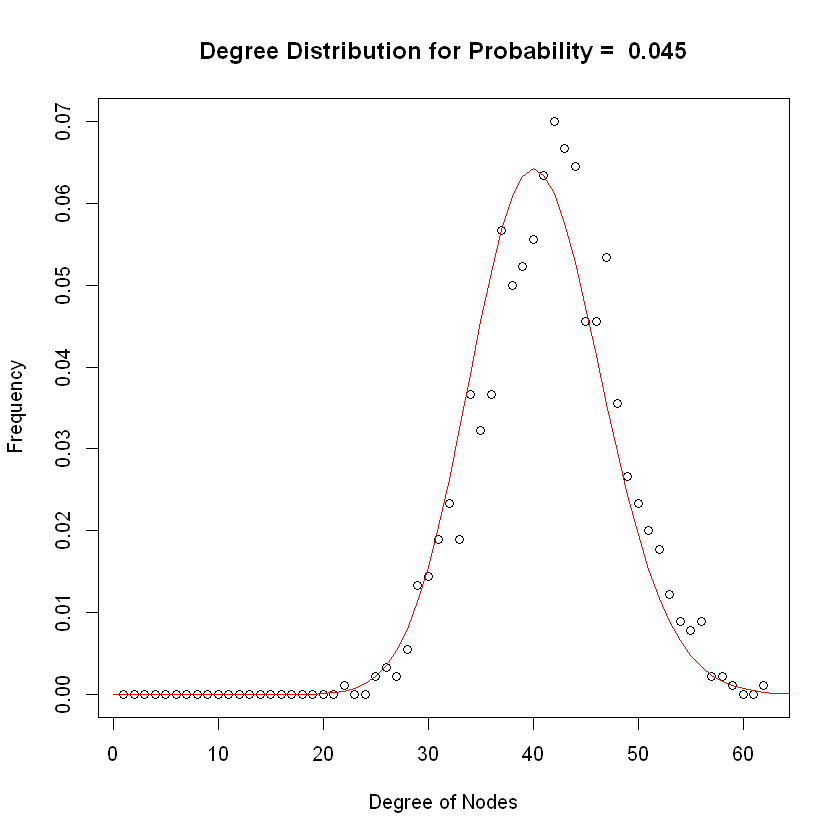

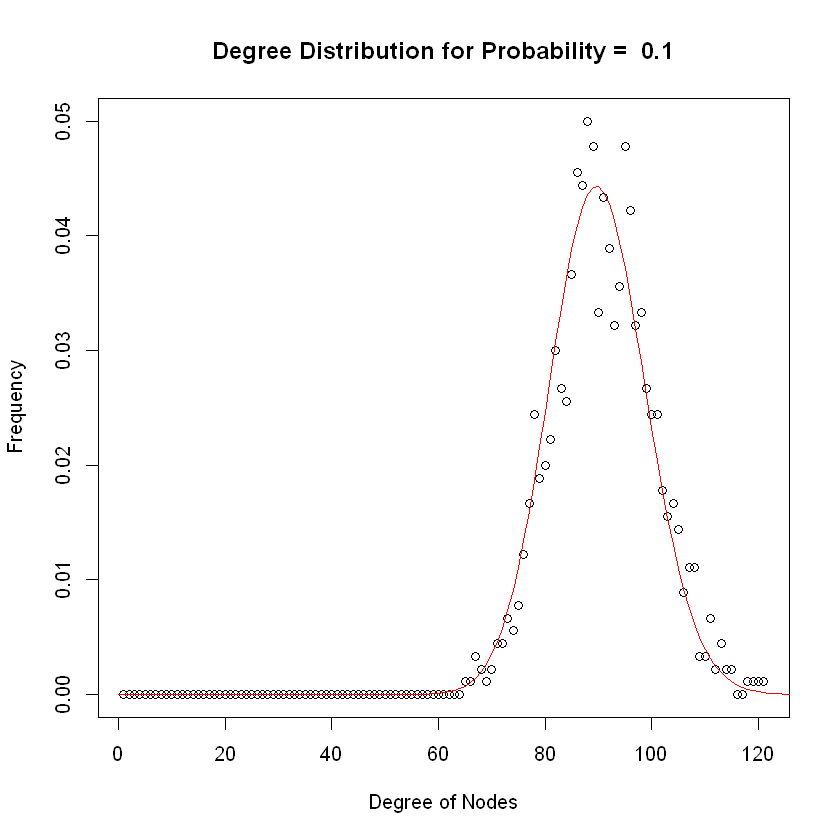

In [3]:
n = 900
prob_list = c(0.002, 0.006, 0.012, 0.045, 0.1)
graph_list = list()

for (p in prob_list) {
  graph = sample_gnp(n, p, directed = FALSE, loops = FALSE) # Undirected, no self-loops
  graph_list[[length(graph_list) + 1]] = graph
  print(paste("Probability = ", p))
  print(length(V(graph)))
  print(paste("Mean of Degrees:", mean(degree(graph))))
  print(paste("Variance of Degrees:", var(degree(graph))))
    
  plot(degree.distribution(graph),main=paste("Degree Distribution for Probability = ", p),xlab="Degree of Nodes",ylab="Frequency")
  lines(seq(0,150, by=1),dbinom(seq(0,150, by=1),n,p), col = 'red')
  degreesVector = degree(graph)
}

In [4]:
prob_list = c(0.002, 0.006, 0.012, 0.045, 0.1)

for (i in 1:length(prob_list))
{
    p = prob_list[i]
    
    graph = graph_list[[i]]
    graph.components = clusters(graph)
    gcc_cluster_id = which.max(graph.components$csize)
    gcc = induced.subgraph(graph,which(graph.components$membership == gcc_cluster_id))
    gcc_diameter = diameter(gcc, directed = FALSE)
    
    print(paste("For probability = ", p))
    print(paste("GCC's Number of Nodes :", vcount(gcc)))
    print(paste("Diameter of GCC:", gcc_diameter))
    
    n_connected = 0
    n_random_networks = 1000
    for (i in 1:n_random_networks)
    {
        graph = sample_gnp(n, p)
        if (is.connected(graph))
            n_connected = n_connected + 1
    }
    
    print(paste("Probability that the generated network is connected: ", n_connected / n_random_networks))
    
    if (n_connected == n_random_networks)
        print('The graph is connected.')
    else
        print('The graph is not connected.')
    print("**********************************")
}
     

[1] "For probability =  0.002"
[1] "GCC's Number of Nodes : 655"
[1] "Diameter of GCC: 24"
[1] "Probability that the generated network is connected:  0"
[1] "The graph is not connected."
[1] "**********************************"
[1] "For probability =  0.006"
[1] "GCC's Number of Nodes : 893"
[1] "Diameter of GCC: 8"
[1] "Probability that the generated network is connected:  0.023"
[1] "The graph is not connected."
[1] "**********************************"
[1] "For probability =  0.012"
[1] "GCC's Number of Nodes : 900"
[1] "Diameter of GCC: 5"
[1] "Probability that the generated network is connected:  0.987"
[1] "The graph is not connected."
[1] "**********************************"
[1] "For probability =  0.045"
[1] "GCC's Number of Nodes : 900"
[1] "Diameter of GCC: 3"
[1] "Probability that the generated network is connected:  1"
[1] "The graph is connected."
[1] "**********************************"
[1] "For probability =  0.1"
[1] "GCC's Number of Nodes : 900"
[1] "Diameter of GCC: 3"

[1] "p = 0"
[1] "p = 0.00025"
[1] "p = 5e-04"
[1] "p = 0.00075"
[1] "p = 0.001"
[1] "p = 0.00125"
[1] "p = 0.0015"
[1] "p = 0.00175"
[1] "p = 0.002"
[1] "p = 0.00225"
[1] "p = 0.0025"
[1] "p = 0.00275"
[1] "p = 0.003"
[1] "p = 0.00325"
[1] "p = 0.0035"
[1] "p = 0.00375"
[1] "p = 0.004"
[1] "p = 0.00425"
[1] "p = 0.0045"
[1] "p = 0.00475"
[1] "p = 0.005"
[1] "p = 0.00525"
[1] "p = 0.0055"
[1] "p = 0.00575"
[1] "p = 0.006"
[1] "p = 0.00625"
[1] "p = 0.0065"
[1] "p = 0.00675"
[1] "p = 0.007"
[1] "p = 0.00725"
[1] "p = 0.0075"
[1] "p = 0.00775"
[1] "p = 0.008"
[1] "p = 0.00825"
[1] "p = 0.0085"
[1] "p = 0.00875"
[1] "p = 0.009"
[1] "p = 0.00925"
[1] "p = 0.0095"
[1] "p = 0.00975"
[1] "p = 0.01"
[1] "p = 0.01025"
[1] "p = 0.0105"
[1] "p = 0.01075"
[1] "p = 0.011"
[1] "p = 0.01125"
[1] "p = 0.0115"
[1] "p = 0.01175"
[1] "p = 0.012"


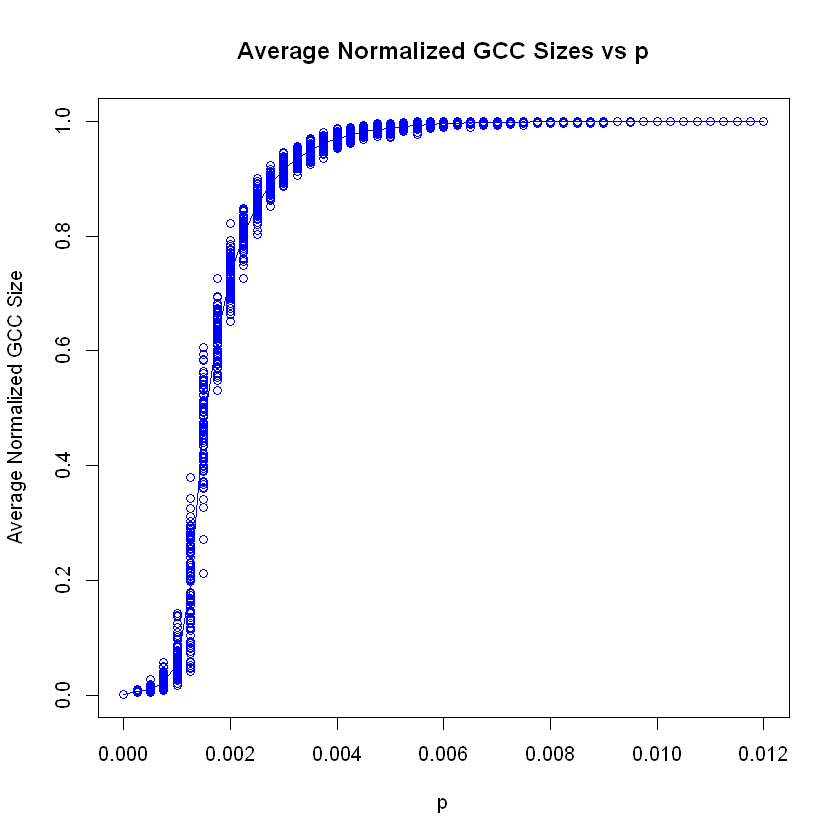

In [5]:
pmax = 0.012
prob = seq(from=0.000, to=pmax, by=0.00025)

len_plot = c()
prob_plot = c()
results = c()

n_random_networks = 100
for (p in prob) 
{
  size = 0
  for (iter in 1:n_random_networks)
  {
    graph = sample_gnp(n, p)
      
    graph.components = clusters(graph)
    gcc_cluster_id = which.max(graph.components$csize)
    gcc = induced.subgraph(graph,which(graph.components$membership == gcc_cluster_id))
    prob_plot = c(prob_plot, p)  
    len_plot = c(len_plot, length(V(gcc))/n)
    size = size + length(V(gcc))/n 
  }
  results = c(results,(size/n_random_networks))
  print(paste("p =",p))
}
plot(prob_plot, len_plot,col='blue', main= 'Average Normalized GCC Sizes vs p', xlab = 'p', ylab = 'Average Normalized GCC Size')
lines(prob,results, col='blue')

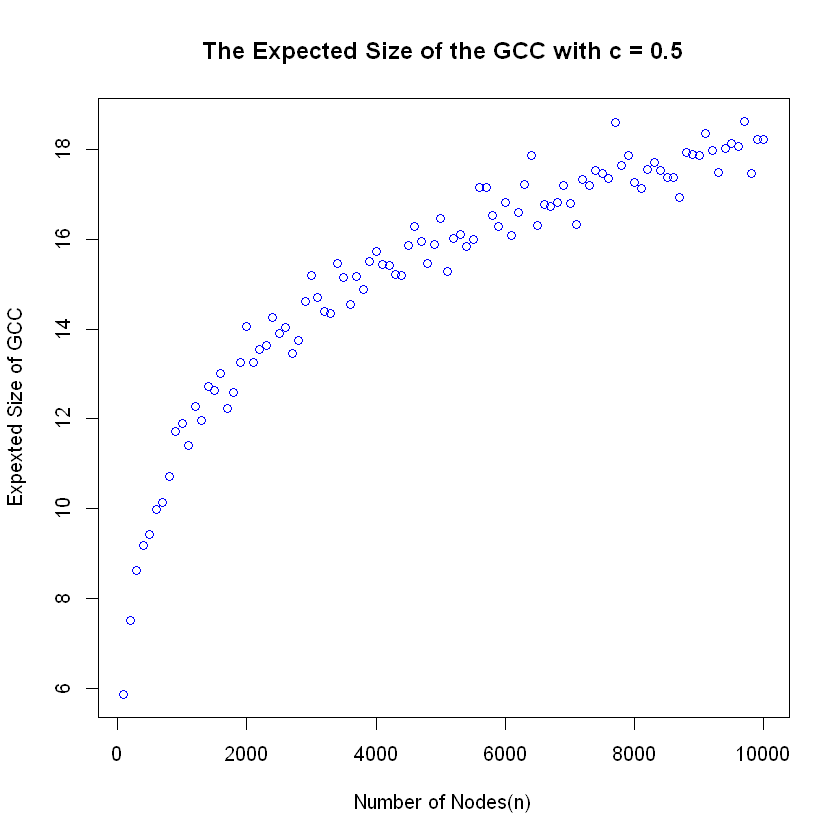

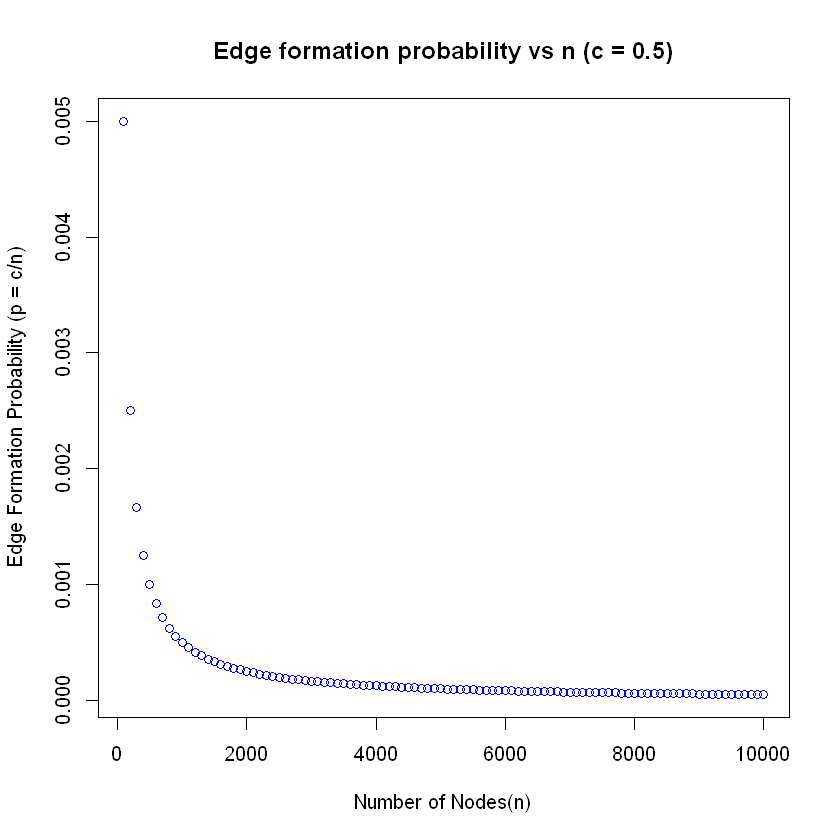

In [6]:
n = seq(100,10000,100)

GCC_Size <- function(n,c_val)
{
  
  p = c_val/n
  n_random_networks = 100
  e_gcc_size = 0
  gcc_size = 0
  for (i in 1:n_random_networks)
  {
    graph = sample_gnp(n, p)
    graph.components = clusters(graph)
    gcc_cluster_id = which.max(graph.components$csize)
    gcc = induced.subgraph(graph,which(graph.components$membership == gcc_cluster_id))
    gcc_size = gcc_size + length(V(gcc))
    
  }
  e_gcc_size = gcc_size/n_random_networks
  return(e_gcc_size) 
}

c_val = 0.5

gcc_size_1 = c()
for (i in 1:length(n))
  gcc_size_1 <- c(gcc_size_1, GCC_Size(n[i],c_val))
plot(n, gcc_size_1,main = 'The Expected Size of the GCC with c = 0.5',col="blue", xlab = 'Number of Nodes(n)', ylab ='Expexted Size of GCC')
plot(n,c_val/n, main = 'Edge formation probability vs n (c = 0.5)',col = "blue", xlab = 'Number of Nodes(n)', ylab = 'Edge Formation Probability (p = c/n)')

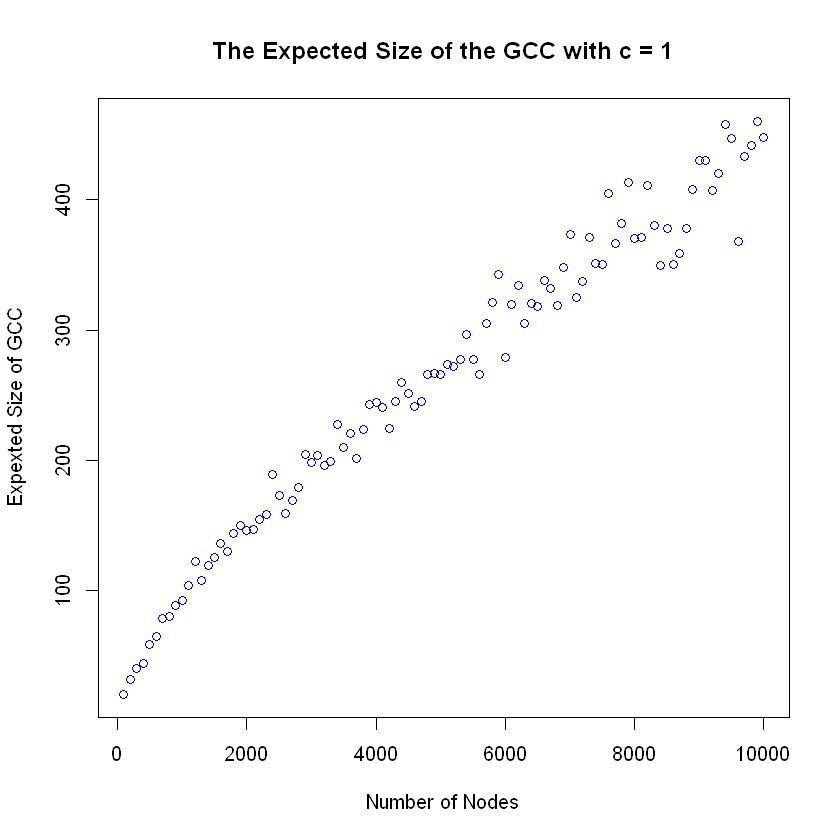

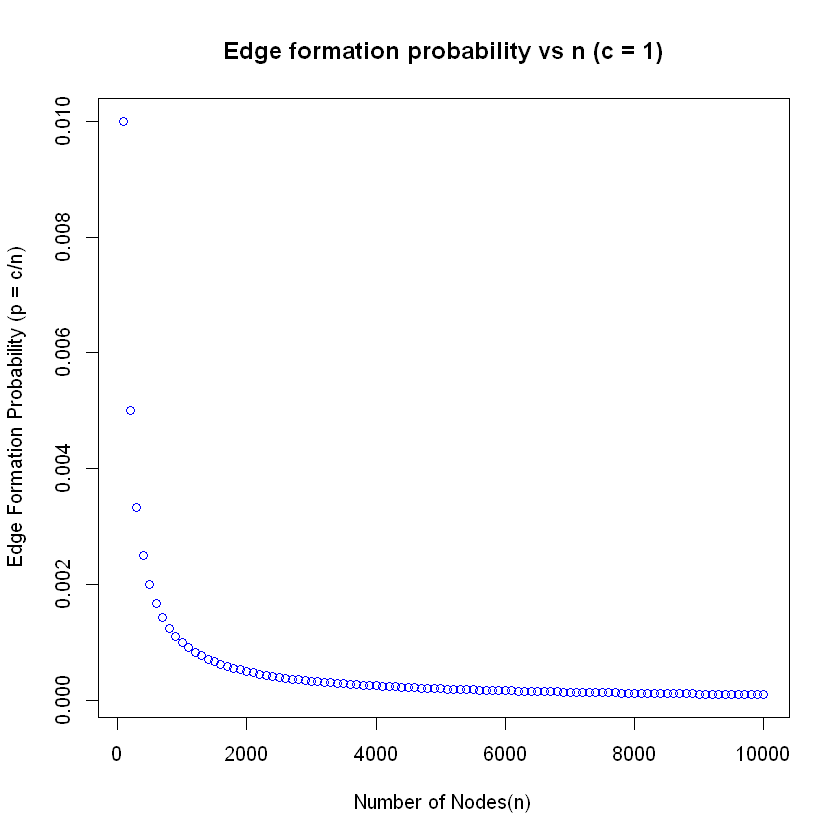

In [7]:
c_val = 1 
gcc_size_2 =c()
for (i in 1:length(n))
  gcc_size_2 = c(gcc_size_2, GCC_Size(n[i],c_val))
plot(n, gcc_size_2, main =  'The Expected Size of the GCC with c = 1',col="blue", xlab = 'Number of Nodes', ylab ='Expexted Size of GCC')
plot(n,c_val/n, main = 'Edge formation probability vs n (c = 1)',col = "blue", xlab = 'Number of Nodes(n)', ylab = 'Edge Formation Probability (p = c/n)')

In [8]:
c_val <- 1.15
gcc_size_3 <- c()
for (i in 1:length(n))
  gcc_size_3 = c(gcc_size_3, GCC_Size(n[i],c_val))

c_val <- 1.25
gcc_size_4 <- c()
for (i in 1:length(n))
  gcc_size_4 = c(gcc_size_4, GCC_Size(n[i],c_val))

c_val <- 1.35
gcc_size_5 <- c()
for (i in 1:length(n))
  gcc_size_5 = c(gcc_size_5, GCC_Size(n[i],c_val))

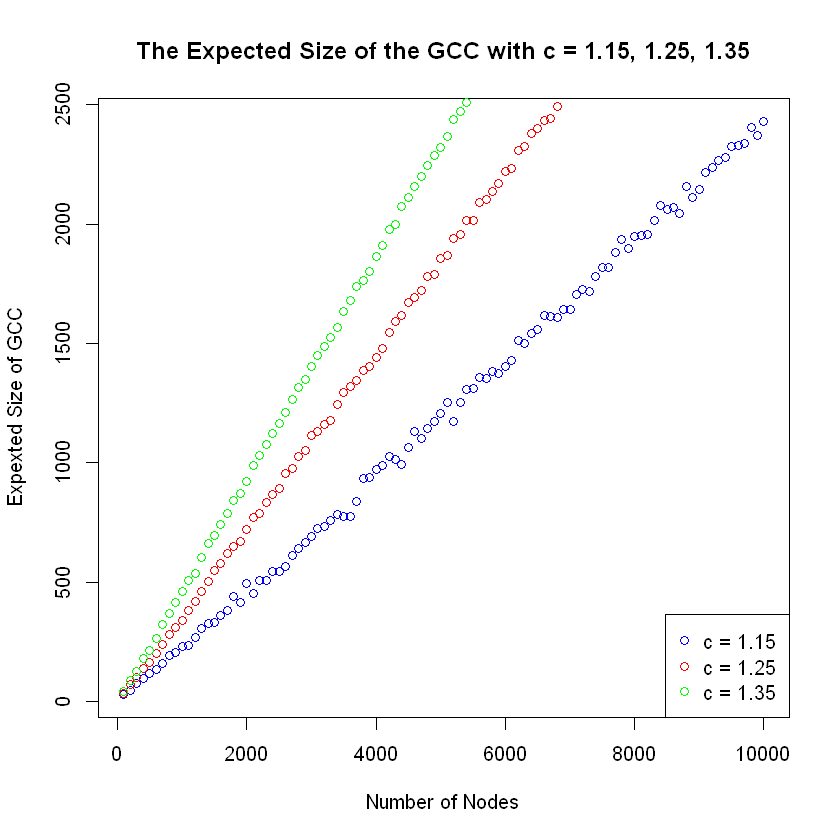

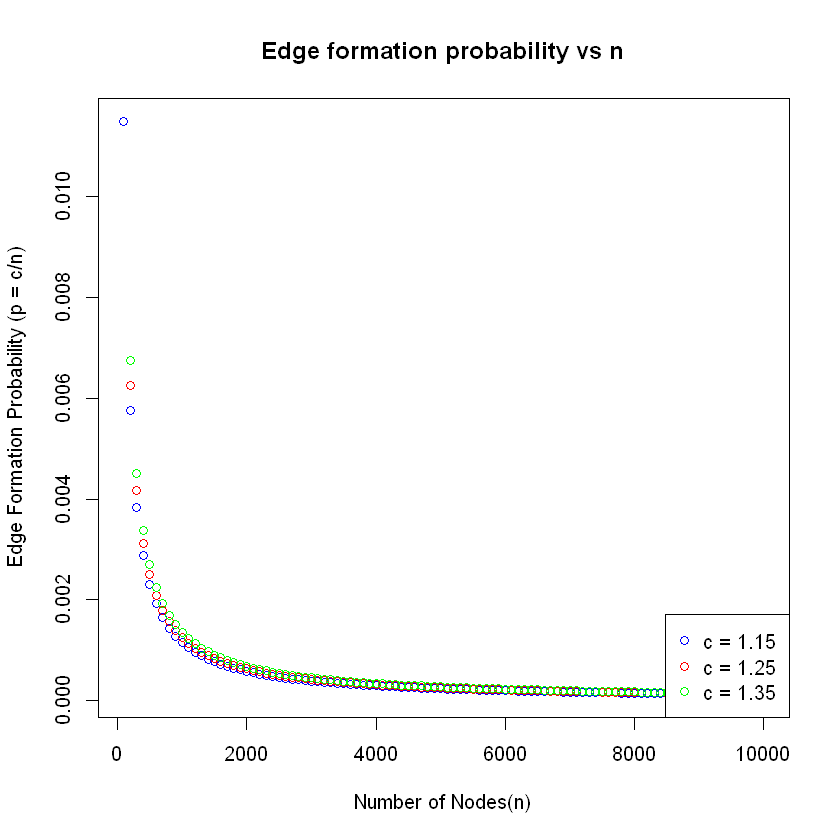

In [9]:
plot(n, gcc_size_3,main = 'The Expected Size of the GCC with c = 1.15, 1.25, 1.35',col="blue", xlab = 'Number of Nodes', ylab ='Expexted Size of GCC')
points(n,gcc_size_4,col="red")
points(n,gcc_size_5,col="green")
legend("bottomright", legend=c("c = 1.15", "c = 1.25", "c = 1.35"), col=c("blue", "red", "green") ,pch = c(1,1,1) )
plot(n,1.15/n, main = 'Edge formation probability vs n',col = "blue", xlab = 'Number of Nodes(n)', ylab = 'Edge Formation Probability (p = c/n)')
points(n,1.25/n,col="red")
points(n,1.35/n,col="green")
legend("bottomright", legend=c("c = 1.15", "c = 1.25", "c = 1.35"), col=c("blue", "red", "green") ,pch = c(1,1,1) )
